# Testing the systematics metrics

In [1]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import scripts.plotting_scripts.plotting as p
from scripts.presets import Presets
from scripts.galaxy_bias import GalaxyBias
from scripts.systematics_metrics import SystematicsMetrics
import numpy as np


I am using pyccl version 2.8.0


## Preliminaries

In [2]:
redshift_max = 3.5
redshift_resolution = 300  # this is the first resolution of redshifts
forecast_year = "1"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution,
                  forecast_year=forecast_year)


## Galaxy Bias

In [3]:
%%time
sm = SystematicsMetrics(presets)
gbias = GalaxyBias(presets).get_galaxy_bias()
ccl_version = ccl.__version__
gbias_path = "data_output/galaxy_bias/"
gbias_zres_file = f"galaxy_bias_zres_sweep_y{forecast_year}_zmax3.5_ccl_v{ccl_version}.npy"
galaxy_bias_zres_sweep = np.load(f"{gbias_path}{gbias_zres_file}", allow_pickle=True).item()

# If you want to recompute the galaxy bias, uncomment the following line.
# galaxy_bias_zres_sweep = sm.galaxy_bias_zres_sweep()


CPU times: user 18.8 ms, sys: 1.82 ms, total: 20.6 ms
Wall time: 19.4 ms


In [4]:
%%time

gbias_zres_zmax_file = f"galaxy_bias_zres_zmax_sweep_y{forecast_year}_zmax_range_3.0_to_4.0_ccl_v{ccl_version}.npy"
galaxy_bias_zres_and_zmax_sweep = np.load(f"{gbias_path}{gbias_zres_zmax_file}", allow_pickle=True).item()

# If you want to recompute the galaxy bias, uncomment the following line.
# galaxy_bias_zres_and_zmax_sweep = sm.galaxy_bias_zres_and_zmax_sweep()


CPU times: user 13.6 ms, sys: 7.4 ms, total: 21 ms
Wall time: 17.4 ms


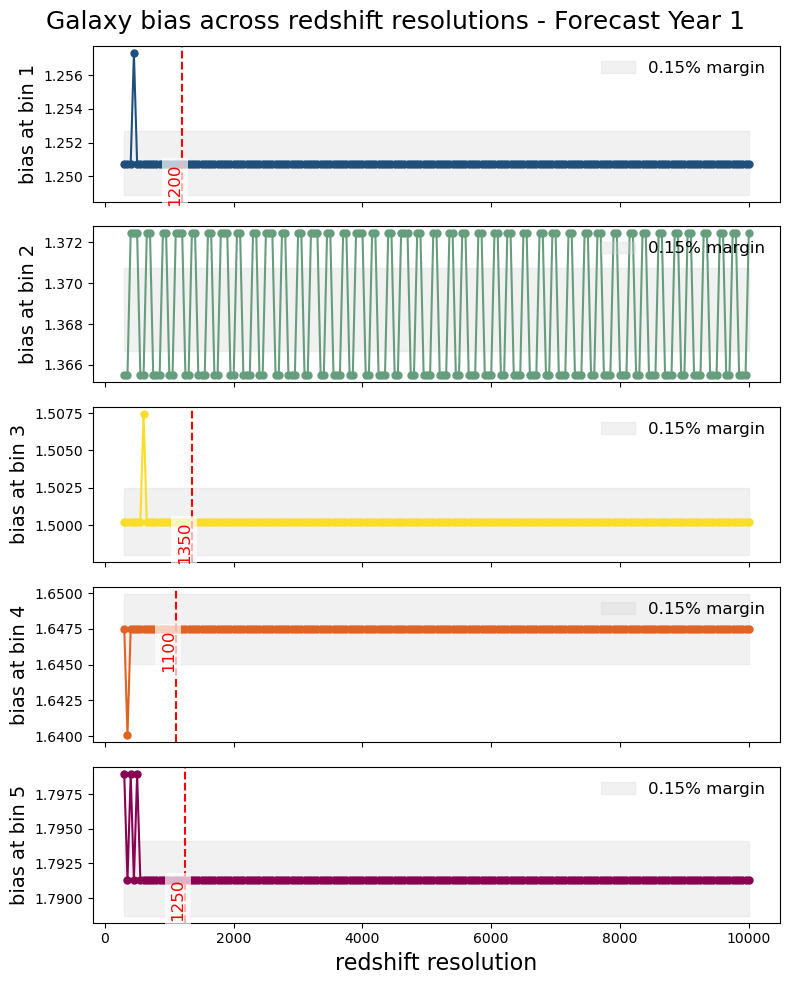

In [5]:
p.plot_gbias_values_zres_sweep(
    galaxy_bias_resolutions=galaxy_bias_zres_sweep,
    forecast_year=forecast_year,
    precision=0.15,
    stability_steps=15,
    marker_size=5
)


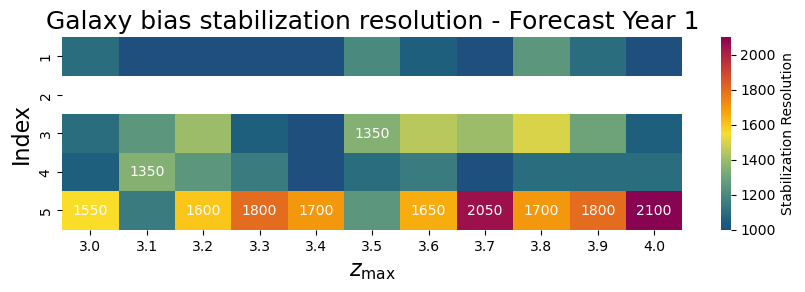

In [6]:
p.plot_gbias_value_zres_zmax_sweep(
    galaxy_bias_zres_and_zmax_sweep,
    forecast_year=forecast_year,
    precision=0.15,
    stability_steps=15,
    annotate_max=True
)
